# Proyek Casptone Klasifikasi Diabetes: DiaMate





In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


## Import Library yang Digunakan

In [4]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.33.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflowjs as tfjs
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from warnings import filterwarnings
filterwarnings('ignore')

## Data Preparation

### Data Loading

In [6]:
data = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [7]:
# Menampilkan dataset
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Data Preparation

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [9]:
data['Age']=data['Age'].astype('int64')
data['Education']=data['Education'].astype('int64')
data['Income']=data['Income'].astype('int64')
data['BMI']=data['BMI'].astype('int64')
data['CholCheck']=data['CholCheck'].astype('int64')
data['Smoker']=data['Smoker'].astype('int64')
data['Stroke']=data['Stroke'].astype('int64')
data['HeartDiseaseorAttack']=data['HeartDiseaseorAttack'].astype('int64')
data['PhysActivity']=data['PhysActivity'].astype('int64')
data['Fruits']=data['Fruits'].astype('int64')
data['Veggies']=data['Veggies'].astype('int64')
data['HvyAlcoholConsump']=data['HvyAlcoholConsump'].astype('int64')
data['AnyHealthcare']=data['AnyHealthcare'].astype('int64')
data['NoDocbcCost']=data['NoDocbcCost'].astype('int64')
data['GenHlth']=data['GenHlth'].astype('int64')
data['MentHlth']=data['MentHlth'].astype('int64')
data['PhysHlth']=data['PhysHlth'].astype('int64')
data['DiffWalk']=data['DiffWalk'].astype('int64')
data['Sex']=data['Sex'].astype('int64')
data['Diabetes_binary']=data['Diabetes_binary'].astype('int64')
data['HighBP']=data['HighBP'].astype('int64')
data['HighChol']=data['HighChol'].astype('int64')

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


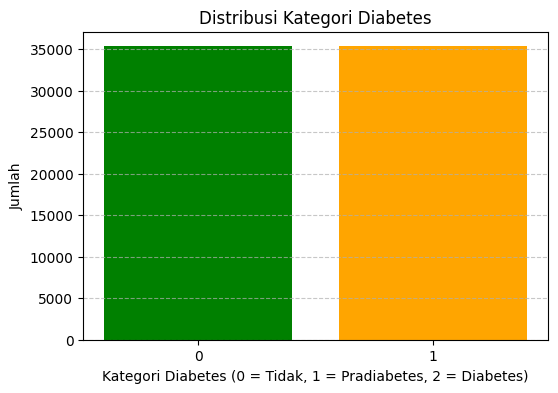

In [11]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing kelas
diabetes_counts = data['Diabetes_binary'].value_counts().sort_index()


# Buat bar chart
plt.figure(figsize=(6, 4))
plt.bar(diabetes_counts.index.astype(str), diabetes_counts.values, color=['green', 'orange', 'red'])
plt.title('Distribusi Kategori Diabetes')
plt.xlabel('Kategori Diabetes (0 = Tidak, 1 = Pradiabetes, 2 = Diabetes)')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
diabetes_counts.values

array([35346, 35346])

Data Cleaning

In [13]:
data.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [14]:
data.duplicated().sum()

np.int64(1635)

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(69057, 22)

Organize Columns

In [17]:
data = data.rename(columns={'Diabetes_binary': 'Diabetes'})

In [18]:
data=data.reindex(columns=[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income','Diabetes'])

In [ ]:
data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,0,1,26,0,0,0,1,0,1,...,0,3,5,30,0,1,4,6,8,0
1,1,1,1,26,1,1,0,0,1,0,...,0,3,0,0,0,1,12,6,8,0
2,0,0,1,26,0,0,0,1,1,1,...,0,1,0,10,0,1,13,6,8,0
3,1,1,1,28,1,0,0,1,1,1,...,0,3,0,3,0,1,11,6,8,0
4,0,0,1,29,1,0,0,1,1,1,...,0,2,0,0,0,0,8,5,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0,1,1,37,0,0,0,0,0,1,...,0,4,0,0,0,0,6,4,1,1
70688,0,1,1,29,1,0,1,0,1,1,...,0,2,0,0,1,1,10,3,6,1
70689,1,1,1,25,0,0,1,0,1,0,...,0,5,15,0,1,0,13,6,4,1
70690,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1


**EDA**

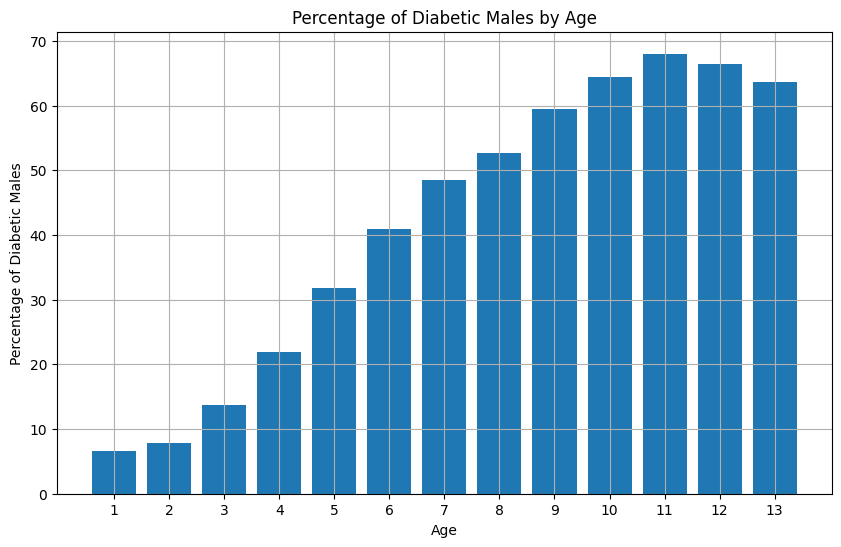

Maximum percentage of diabetic males is 68.04% at age 11.


In [19]:
# frekuensi penderita diabetes dari segala usia untuk pria

data_male = data[data['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Males')
plt.title('Percentage of Diabetic Males by Age')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic males is {:.2f}% at age {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))


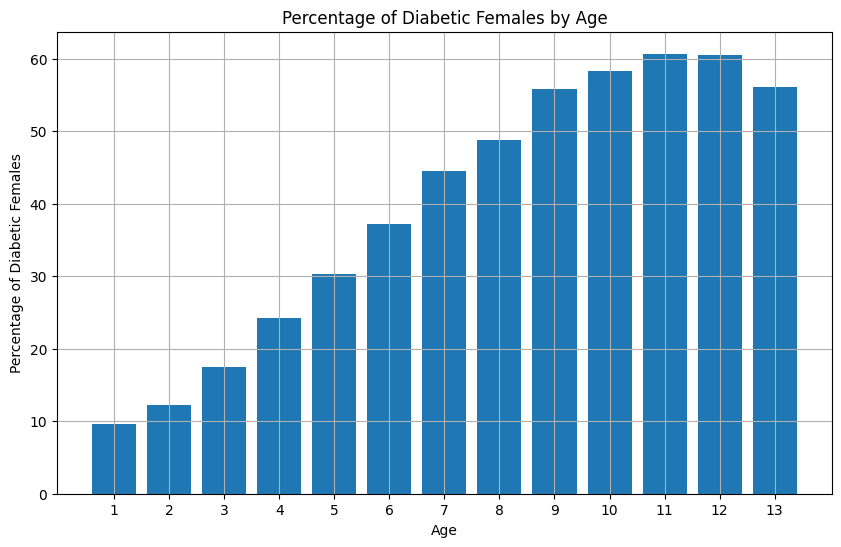

Maximum percentage of diabetic females is 60.71% at age 11.


In [20]:
# frekuensi penderita diabetes dari segala usia untuk perempuan

data_female = data[data['Sex'] == 0]
female_diabetic_by_age = data_female.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(female_diabetic_by_age['Age'], female_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Females')
plt.title('Percentage of Diabetic Females by Age')
plt.xticks(female_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic_by_age.loc[female_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic females is {:.2f}% at age {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))


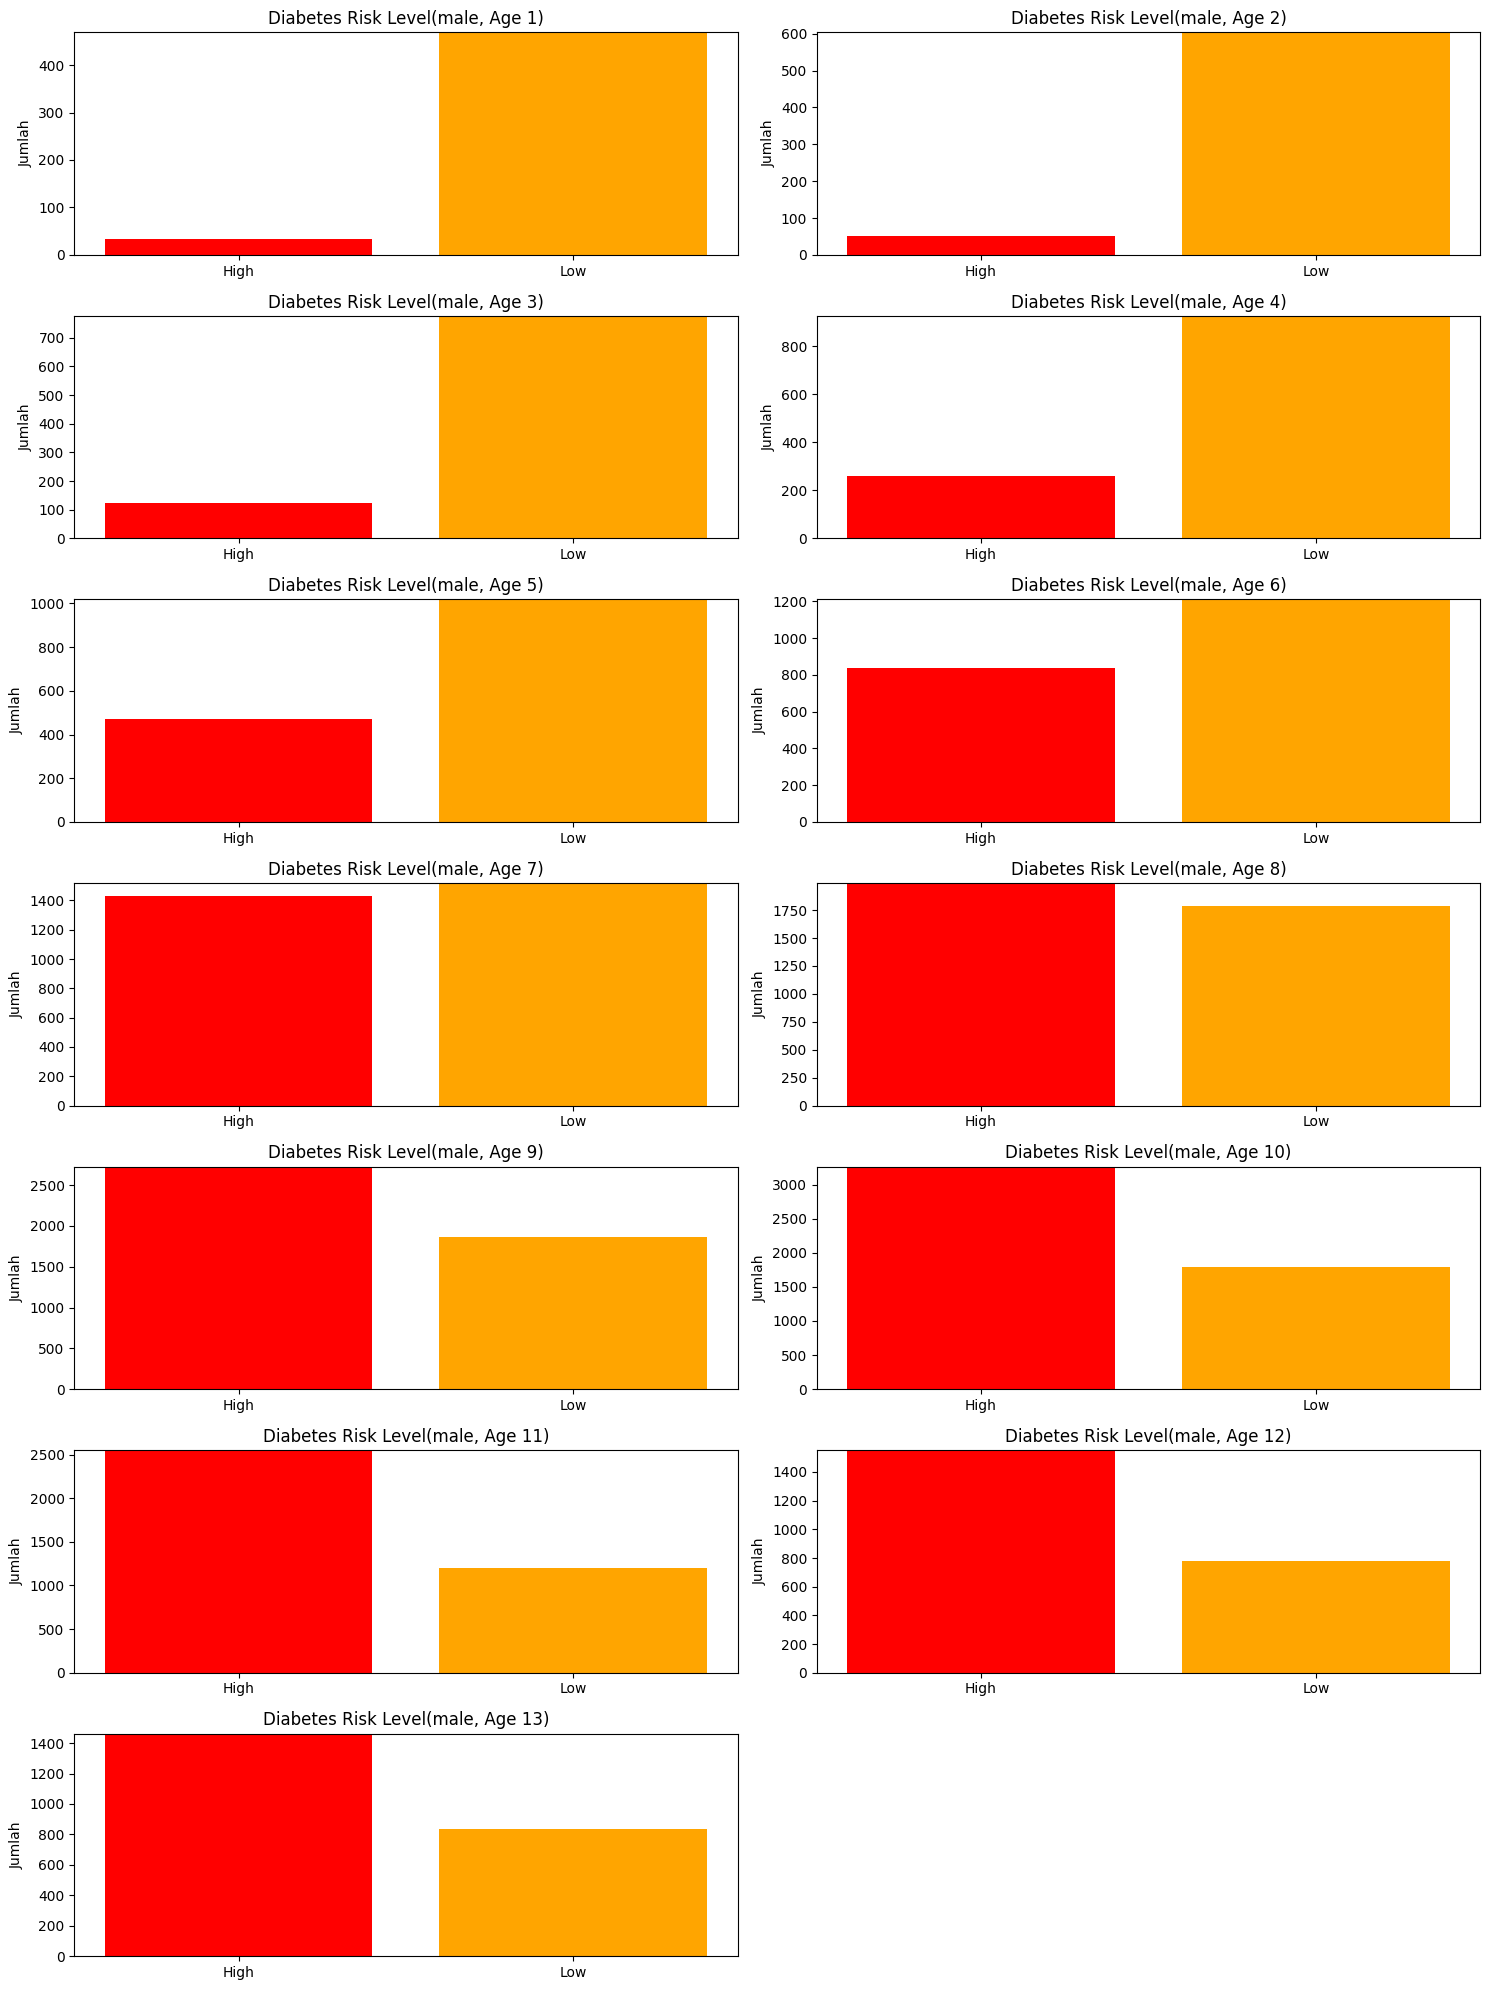

In [22]:
# persentase penderita diabetes dan non-diabetes untuk pria dalam rentang semua usia

plt.figure(figsize=(15, 20))

for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)

    df_male = data[(data['Sex'] == 1) & (data['Age'] == age)]

    diabetic_male = len(df_male[df_male['Diabetes'] == 1])
    non_diabetic_male = len(df_male[df_male['Diabetes'] == 0])

    categories = ['High', 'Low']
    counts = [diabetic_male, non_diabetic_male]

    plt.bar(categories, counts, color=['red', 'orange', 'green'])
    plt.title(f'Diabetes Risk Level(male, Age {age})')
    plt.ylabel('Jumlah')
    plt.ylim(0, max(counts) + 1)  # Tambah margin untuk estetika

plt.tight_layout()
plt.show()


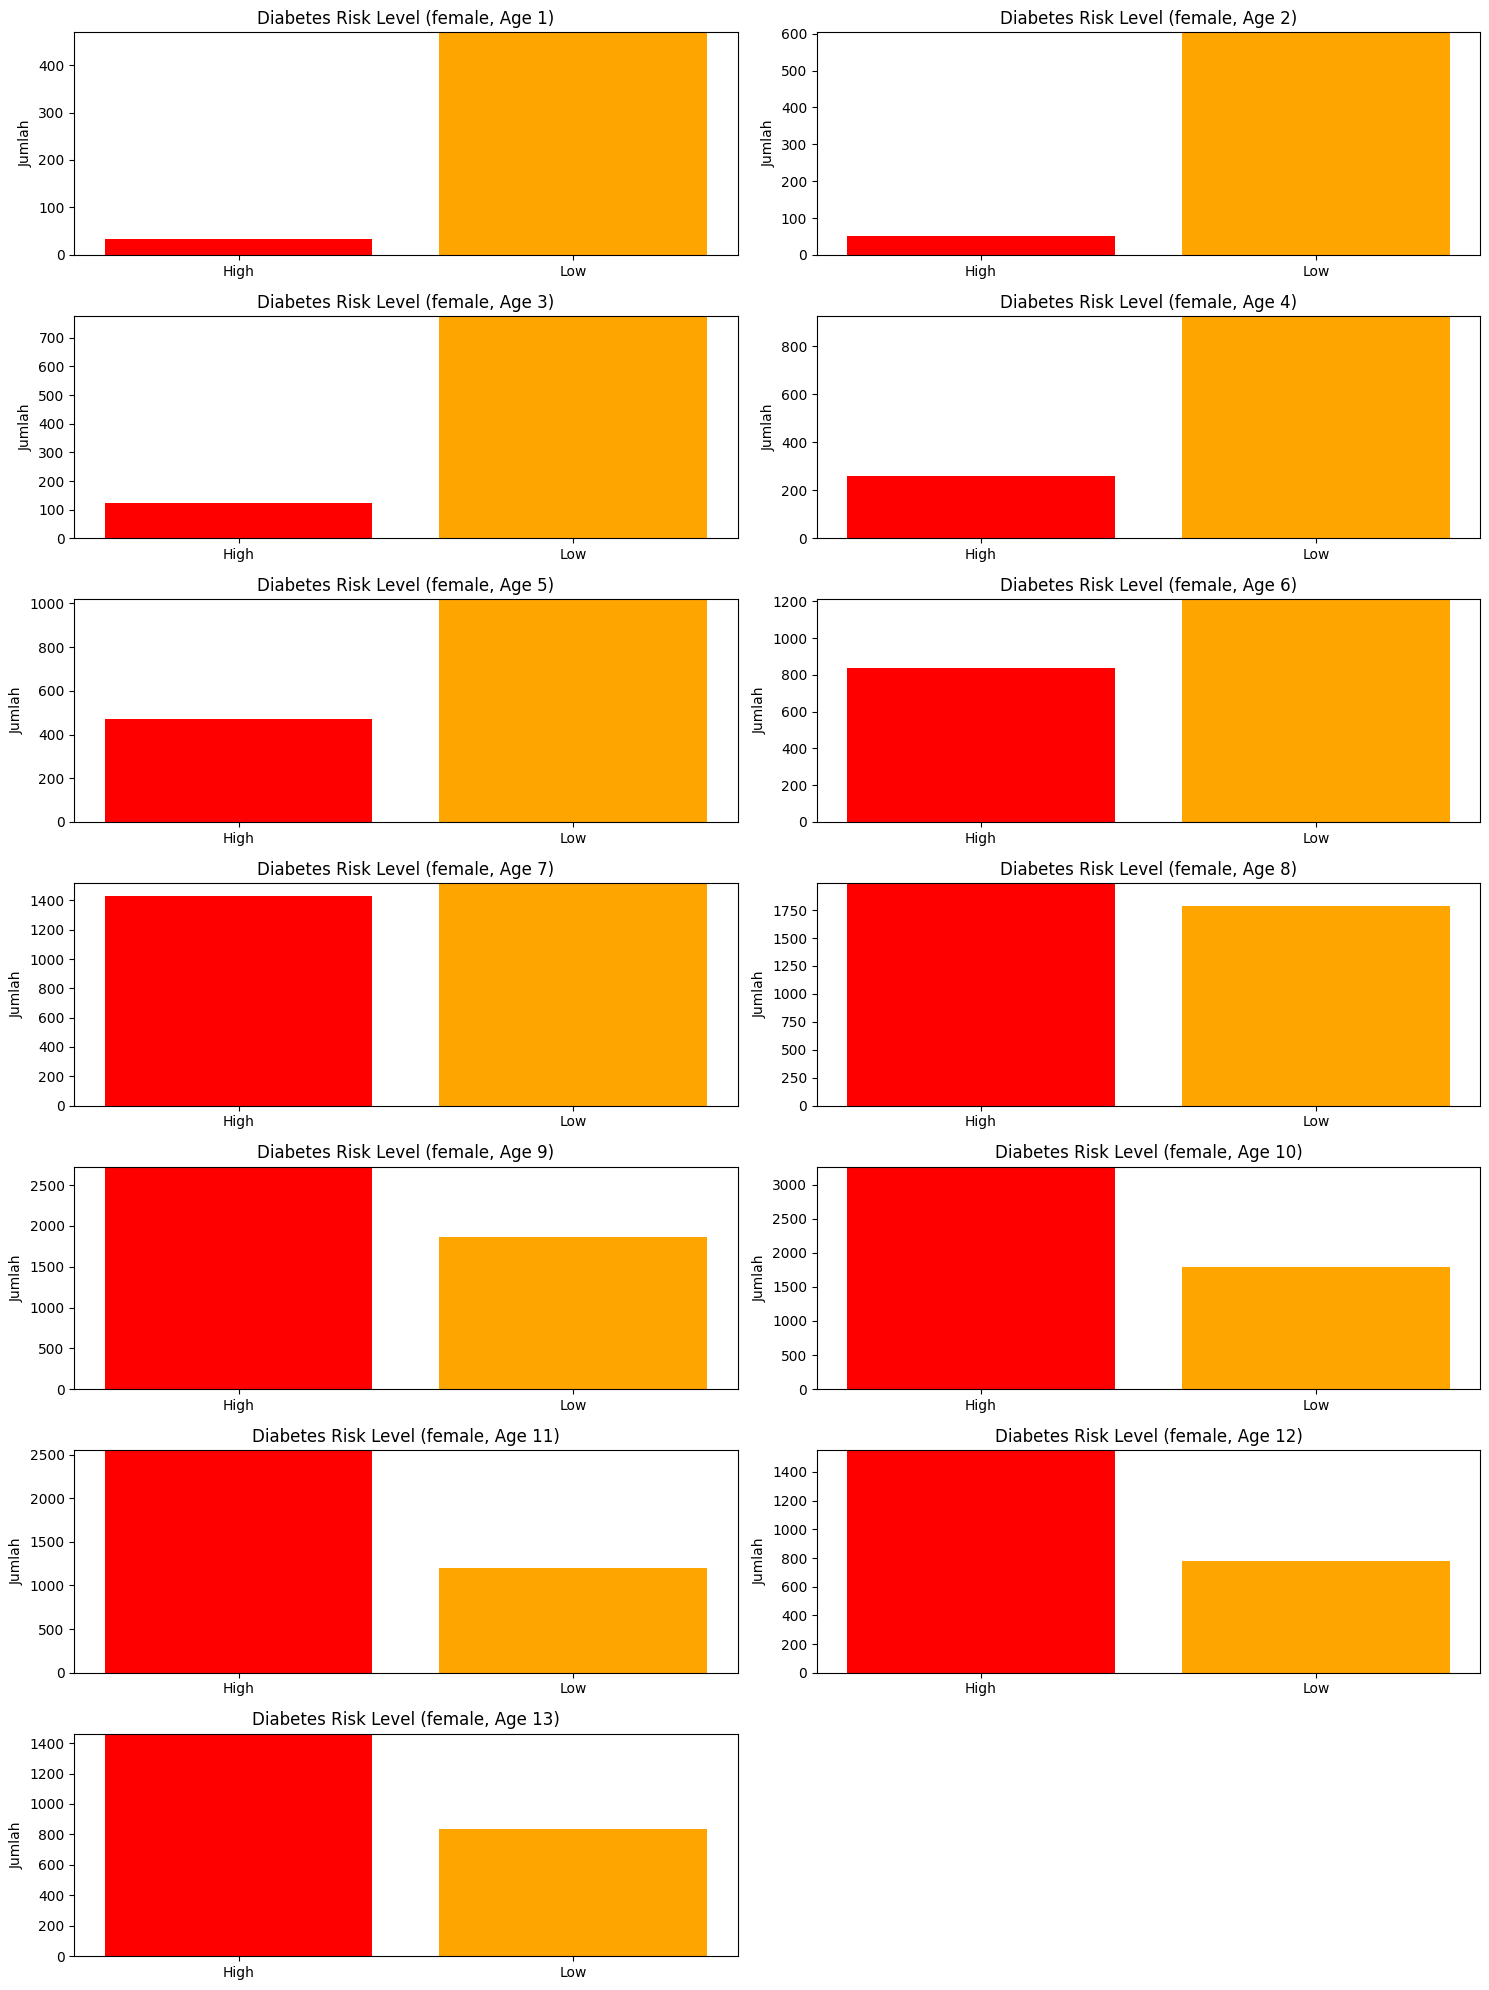

In [23]:
# percentage of diabetics and nondiabetics for female in range of all age

plt.figure(figsize=(15, 20))

for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)

    df_male = data[(data['Sex'] == 1) & (data['Age'] == age)]

    diabetic_female = len(df_male[df_male['Diabetes'] == 1])
    non_diabetic_female = len(df_male[df_male['Diabetes'] == 0])

    categories = ['High', 'Low']
    counts = [diabetic_female, non_diabetic_female]

    plt.bar(categories, counts, color=['red', 'orange', 'green'])
    plt.title(f'Diabetes Risk Level (female, Age {age})')
    plt.ylabel('Jumlah')
    plt.ylim(0, max(counts) + 1)  # Tambah margin untuk estetika

plt.tight_layout()
plt.show()



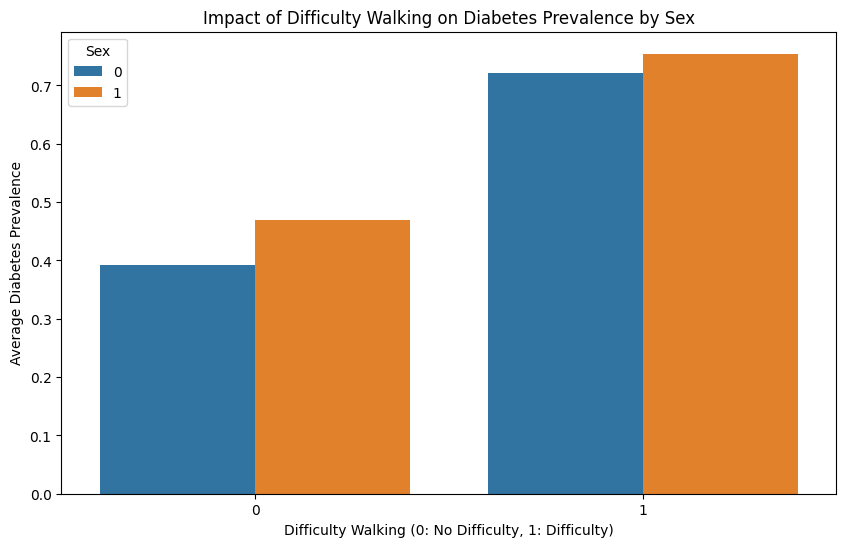

In [ ]:
# Group data by Sex and DiffWalk, calculate mean Diabetes
grouped_data = data.groupby(['Sex', 'DiffWalk'])['Diabetes'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='DiffWalk', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('Difficulty Walking (0: No Difficulty, 1: Difficulty)')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Difficulty Walking on Diabetes Prevalence by Sex')
plt.show()


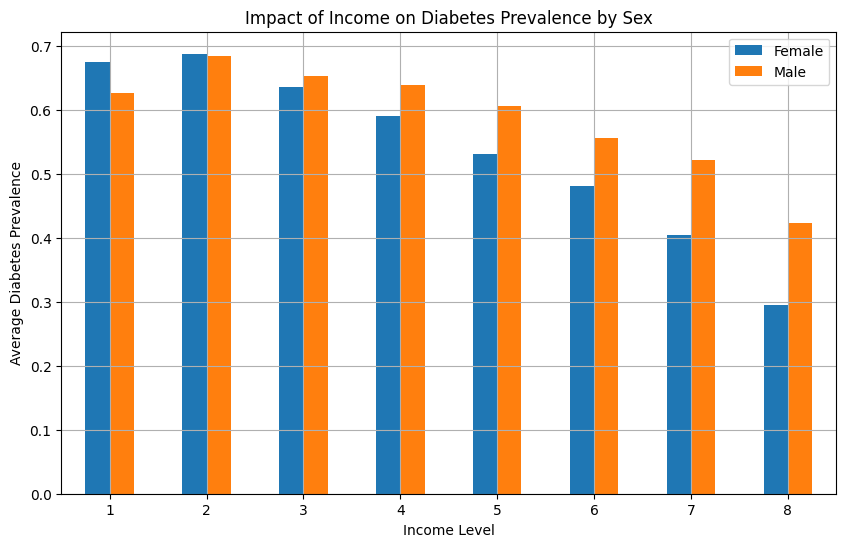

In [ ]:
# the percent impact of income  in  diabetic for male and female
# Group data by income and sex, and calculate the mean diabetes prevalence
income_diabetes_by_sex = data.groupby(['Income', 'Sex'])['Diabetes'].mean().unstack()

# Plot the bar chart
income_diabetes_by_sex.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income Level')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Income on Diabetes Prevalence by Sex')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])
plt.grid(True)
plt.show()

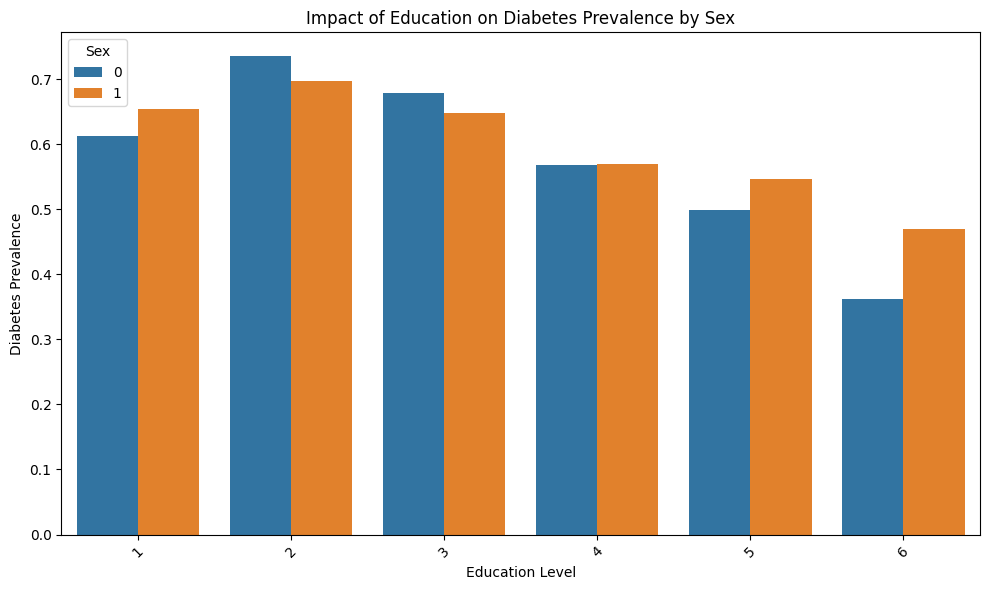

In [ ]:
# the percent impact of education  in  diabetic for male and female
# Group data by education level and sex, and calculate the mean diabetes prevalence
education_diabetes = data.groupby(['Education', 'Sex'])['Diabetes'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Diabetes', hue='Sex', data=education_diabetes)
plt.xlabel('Education Level')
plt.ylabel('Diabetes Prevalence')
plt.title('Impact of Education on Diabetes Prevalence by Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper left')
plt.tight_layout()
plt.show()


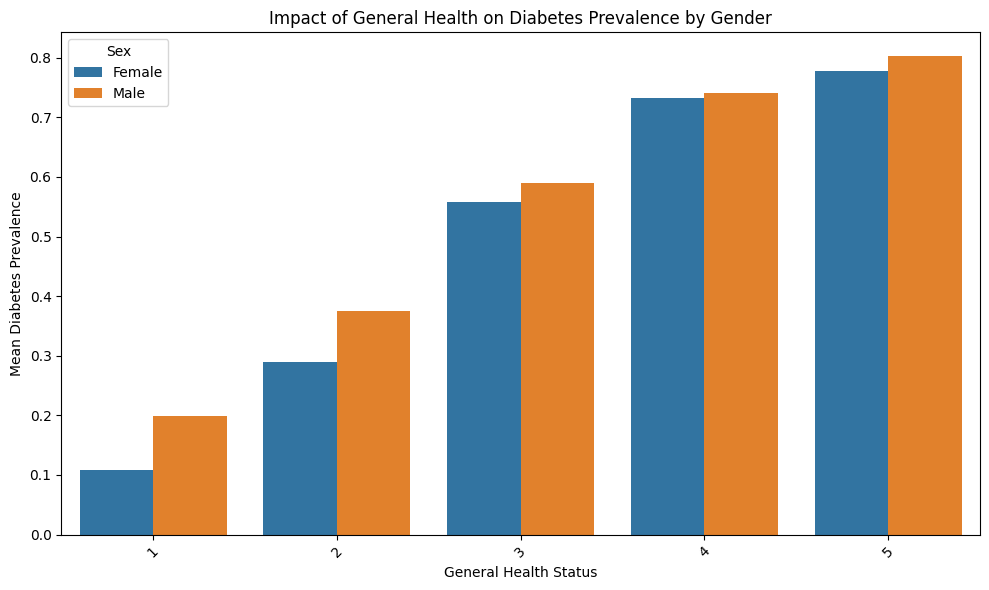

In [ ]:
# the percent impact of genhlth  in  diabetic for male and female
# Group data by gender and general health, then calculate mean diabetes prevalence
grouped_data = data.groupby(['Sex', 'GenHlth'])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='GenHlth', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('General Health Status')
plt.ylabel('Mean Diabetes Prevalence')
plt.title('Impact of General Health on Diabetes Prevalence by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


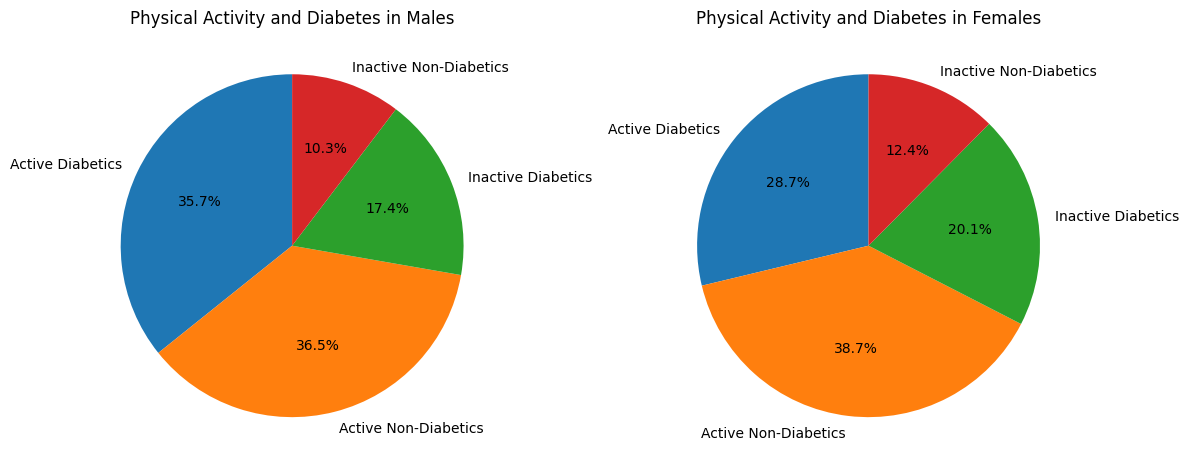

In [24]:
# the percent impact of PhysActivity  in  diabetic for male and female

male_data = data[data['Sex'] == 1]
female_data = data[data['Sex'] == 0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for males
male_active_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 1)].shape[0]
male_active_non_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 0)].shape[0]
male_inactive_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 1)].shape[0]
male_inactive_non_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 0)].shape[0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for females
female_active_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 1)].shape[0]
female_active_non_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 0)].shape[0]
female_inactive_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 1)].shape[0]
female_inactive_non_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 0)].shape[0]

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male pie chart
axes[0].pie([male_active_diabetics, male_active_non_diabetics, male_inactive_diabetics, male_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics','Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Physical Activity and Diabetes in Males')

# Female pie chart
axes[1].pie([female_active_diabetics, female_active_non_diabetics, female_inactive_diabetics, female_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics','Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Physical Activity and Diabetes in Females')

plt.tight_layout()
plt.show()


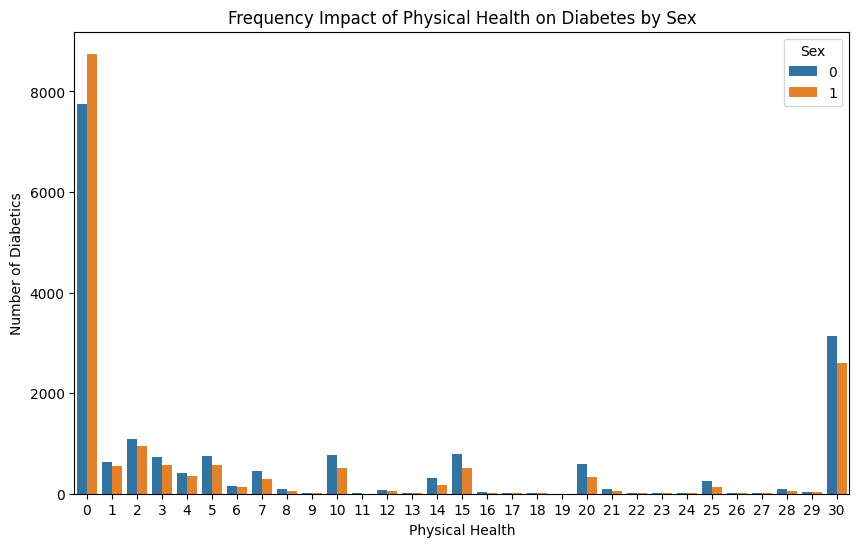

In [ ]:
#the frequency impact of   physicalhlth  in diabetic for male and female

# physicalhlth :- which includes physical illness and injury, for how many days during the past 30
diabetic_by_sex_physhlth = data.groupby(['Sex', 'PhysHlth'])['Diabetes'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PhysHlth', y='Diabetes', hue='Sex', data=diabetic_by_sex_physhlth)
plt.xlabel('Physical Health')
plt.ylabel('Number of Diabetics')
plt.title('Frequency Impact of Physical Health on Diabetes by Sex')
plt.show()


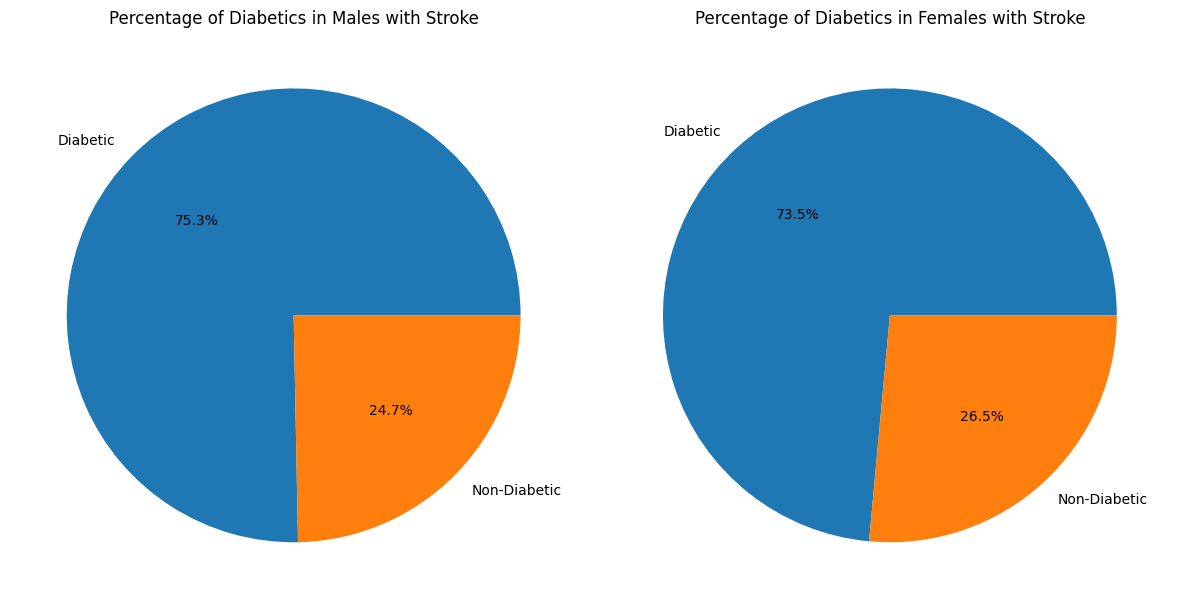

Percentage of diabetics in males with stroke: 75.3%
Percentage of diabetics in females with stroke: 73.5%


In [25]:
# the percent impact of Stroke  in diabetic for male and female
# Filter data for males and females with stroke
male_stroke = data[(data['Sex'] == 1) & (data['Stroke'] == 1)]
female_stroke = data[(data['Sex'] == 0) & (data['Stroke'] == 1)]

# Calculate percentage of diabetics for males with stroke
total_male_stroke = len(male_stroke)
diabetic_male_stroke = len(male_stroke[male_stroke['Diabetes'] == 1])
percent_diabetic_male_stroke = (diabetic_male_stroke / total_male_stroke) * 100

# Calculate percentage of diabetics for females with stroke
total_female_stroke = len(female_stroke)
diabetic_female_stroke = len(female_stroke[female_stroke['Diabetes'] == 1])
percent_diabetic_female_stroke = (diabetic_female_stroke / total_female_stroke) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([percent_diabetic_male_stroke, 100 - percent_diabetic_male_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with Stroke')

plt.subplot(1, 2, 2)
plt.pie([percent_diabetic_female_stroke, 100 - percent_diabetic_female_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with Stroke')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with stroke: {percent_diabetic_male_stroke:.1f}%")
print(f"Percentage of diabetics in females with stroke: {percent_diabetic_female_stroke:.1f}%")


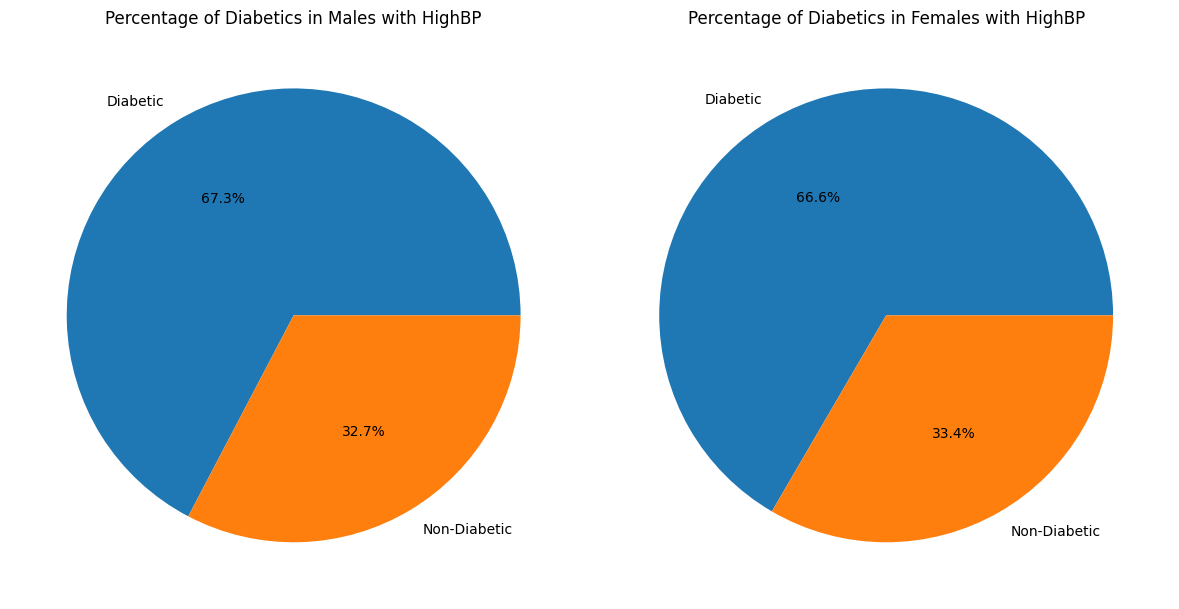

Percentage of diabetics in males with HighBP: 67.3%
Percentage of diabetics in females with HighBP: 66.6%


In [26]:
#the percent impact of HighBP  in  diabetic for male and female
male_highbp = data[(data['Sex'] == 1) & (data['HighBP'] == 1)]
female_highbp = data[(data['Sex'] == 0) & (data['HighBP'] == 1)]

# Calculate percentage of diabetics for males with HighBP
total_male_highbp = len(male_highbp)
diabetic_male_highbp = len(male_highbp[male_highbp['Diabetes'] == 1])
male_percent_diabetic = (diabetic_male_highbp / total_male_highbp) * 100

# Calculate percentage of diabetics for females with HighBP
total_female_highbp = len(female_highbp)
diabetic_female_highbp = len(female_highbp[female_highbp['Diabetes'] == 1])
female_percent_diabetic = (diabetic_female_highbp / total_female_highbp) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with HighBP')

plt.subplot(1, 2, 2)
plt.pie([female_percent_diabetic, 100 - female_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with HighBP')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with HighBP: {male_percent_diabetic:.1f}%")
print(f"Percentage of diabetics in females with HighBP: {female_percent_diabetic:.1f}%")


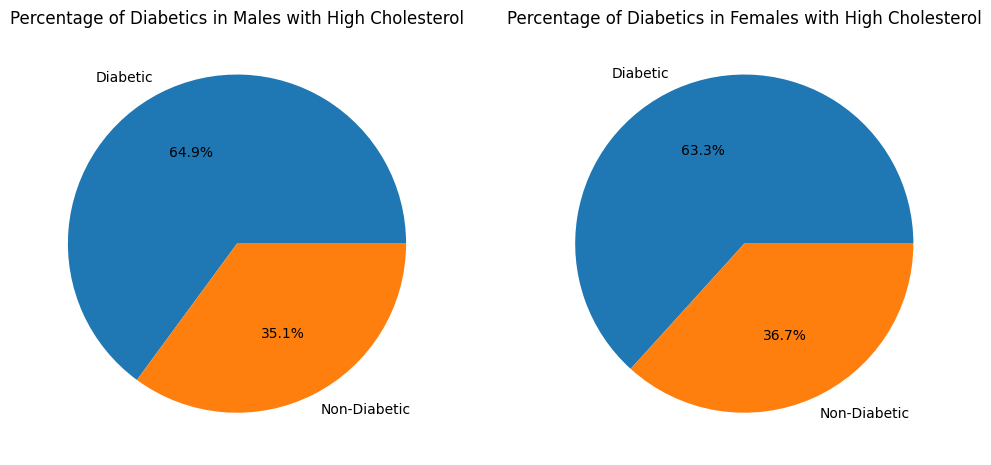

In [27]:
# Filter data for males and females with and without HighChol
male_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 1)]
male_no_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 0)]
female_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 1)]
female_no_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 0)]

# Calculate percentages of diabetics
male_highchol_diabetic_percent = (len(male_highchol[male_highchol['Diabetes'] == 1]) / len(male_highchol)) * 100
male_no_highchol_diabetic_percent = (len(male_no_highchol[male_no_highchol['Diabetes'] == 1]) / len(male_no_highchol)) * 100
female_highchol_diabetic_percent = (len(female_highchol[female_highchol['Diabetes'] == 1]) / len(female_highchol)) * 100
female_no_highchol_diabetic_percent = (len(female_no_highchol[female_no_highchol['Diabetes'] == 1]) / len(female_no_highchol)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_highchol_diabetic_percent, 100 - male_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with High Cholesterol')

plt.subplot(1, 2, 2)
plt.pie([female_highchol_diabetic_percent, 100 - female_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with High Cholesterol')

plt.show()

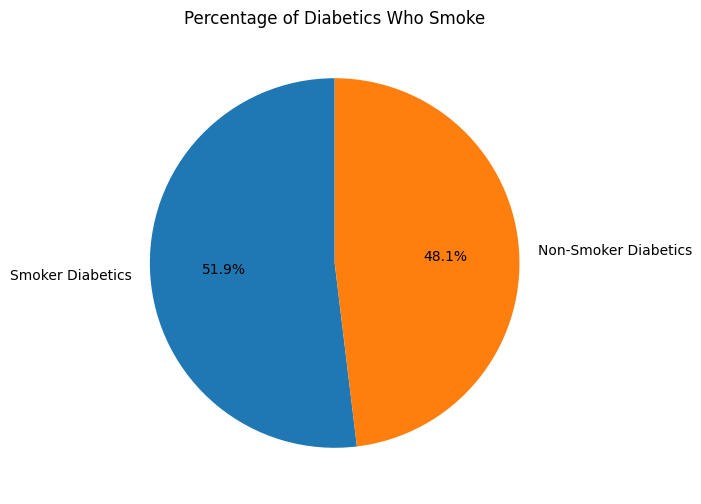

In [28]:
# the percent impact of smoke in diabetic
smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 1)].shape[0]
non_smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 0)].shape[0]

labels = ['Smoker Diabetics', 'Non-Smoker Diabetics']
sizes = [smoker_diabetics, non_smoker_diabetics]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetics Who Smoke')
plt.show()


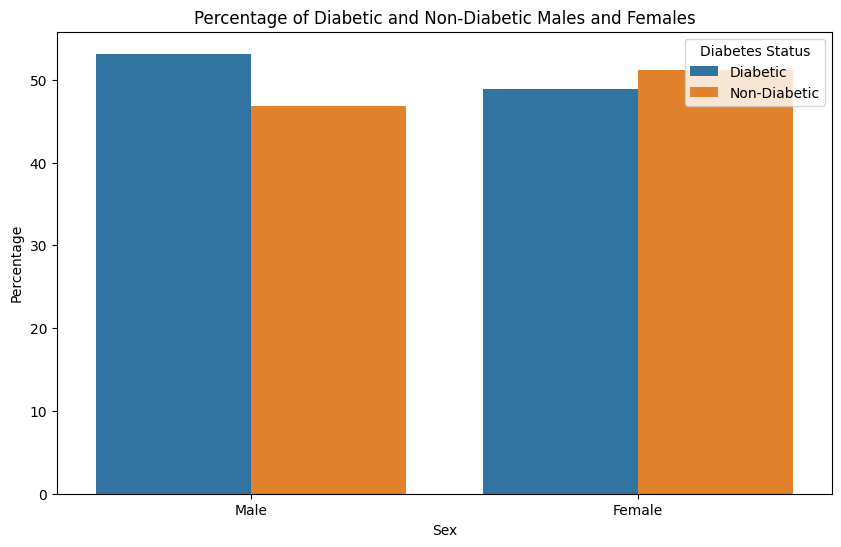

In [29]:
# Count diabetic and non-diabetic males and females
male_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 1)].shape[0]
male_non_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 0)].shape[0]
female_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 1)].shape[0]
female_non_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 0)].shape[0]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Sex': ['Male', 'Male', 'Female', 'Female'],
    'Diabetes Status': ['Diabetic', 'Non-Diabetic', 'Diabetic', 'Non-Diabetic'],
    'Count': [male_diabetic, male_non_diabetic, female_diabetic, female_non_diabetic]
})

# Calculate percentages
df['Percentage'] = df['Count'] / df.groupby('Sex')['Count'].transform('sum') * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Percentage', hue='Diabetes Status', data=df)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetic and Non-Diabetic Males and Females')
plt.show()

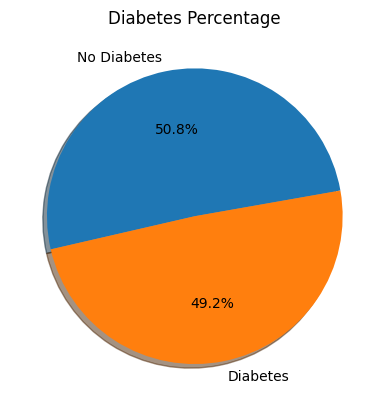

In [30]:
labels = ['No Diabetes', 'Diabetes']

fig, ax = plt.subplots()
ax.pie(data['Diabetes'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax.set_title('Diabetes Percentage')
plt.show()


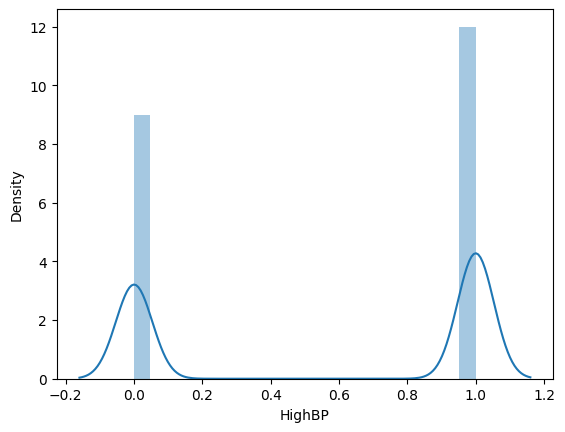

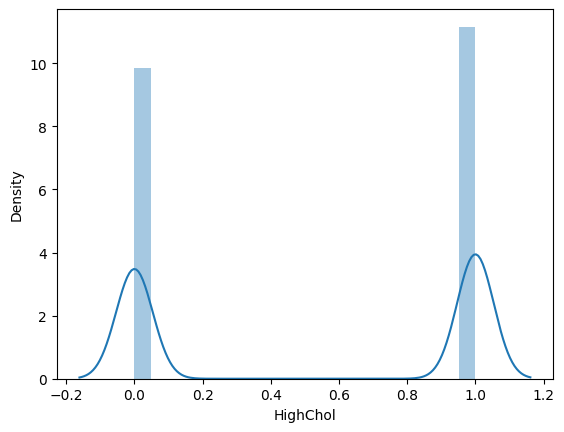

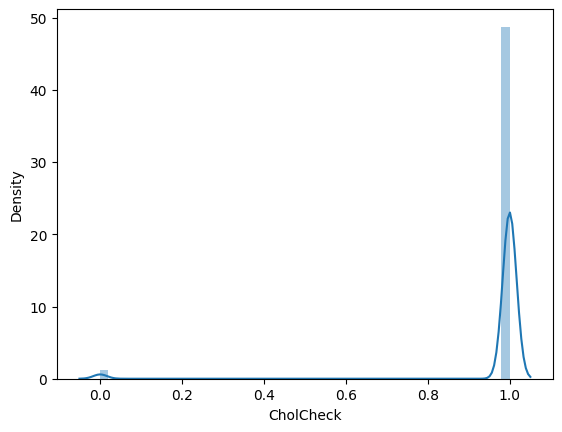

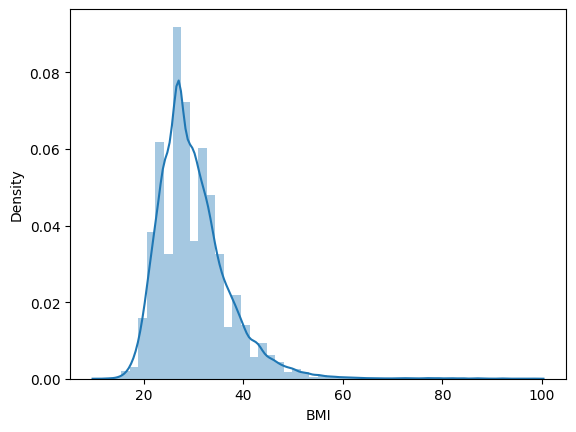

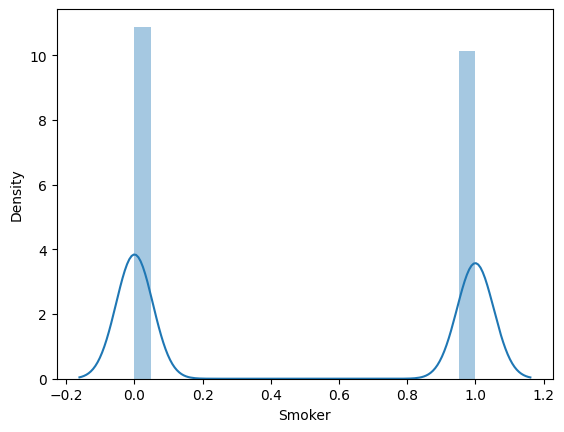

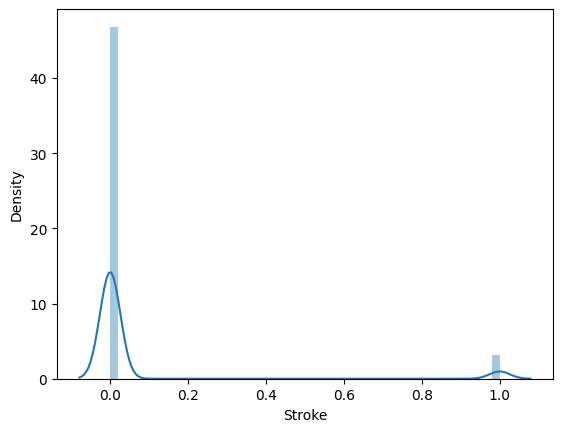

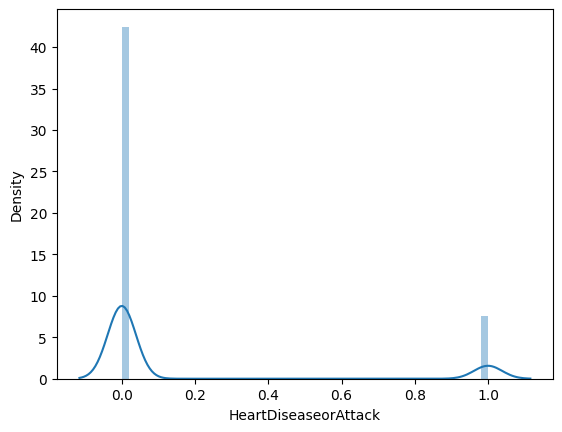

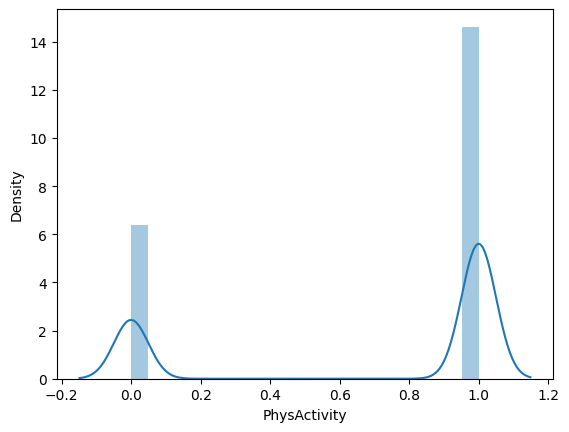

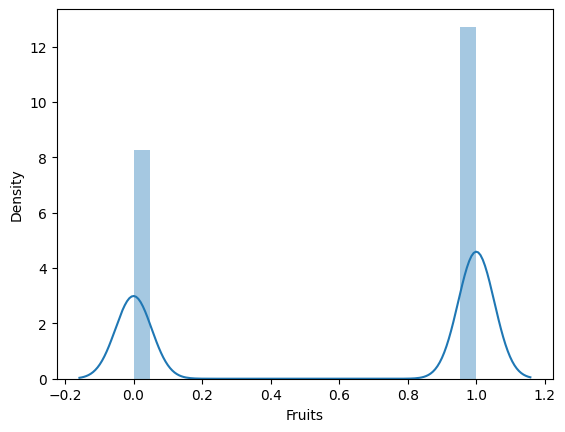

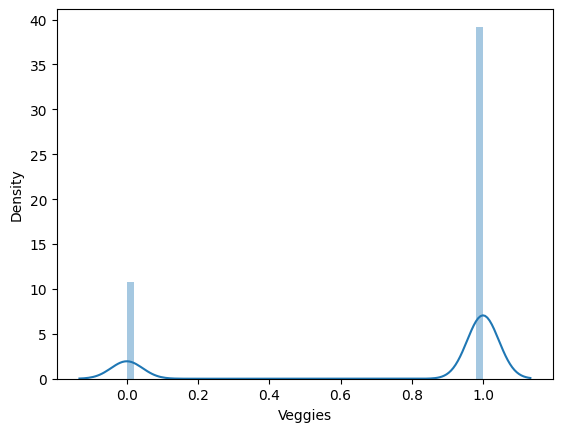

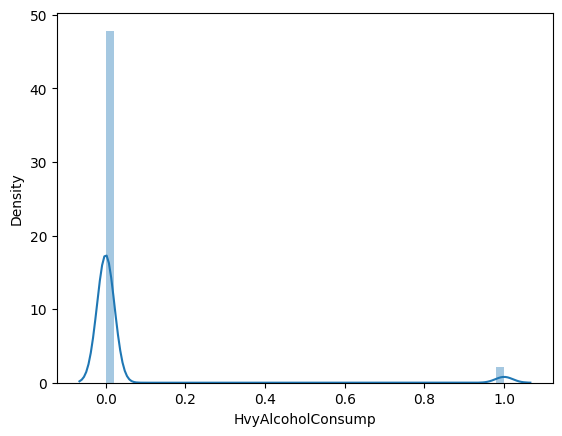

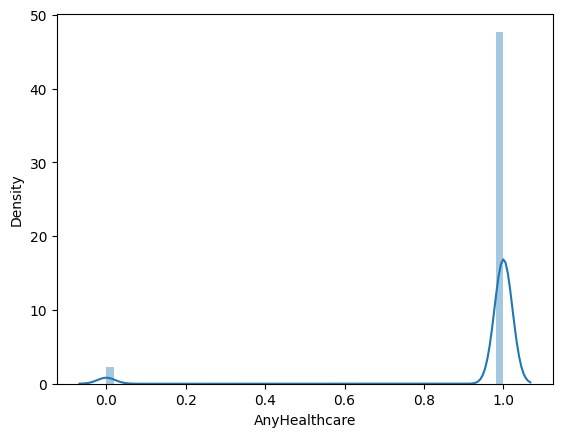

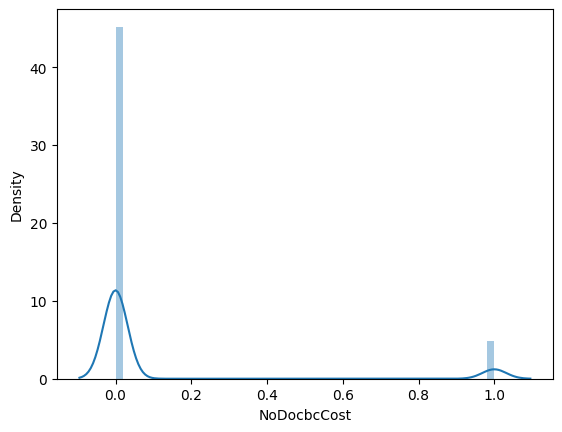

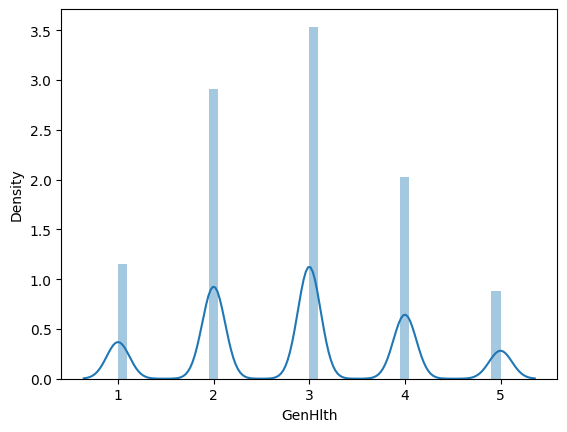

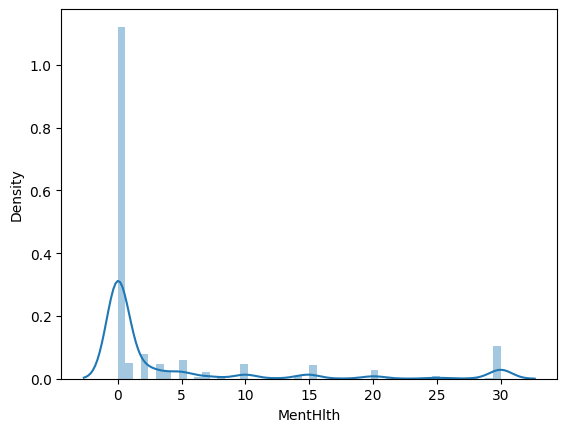

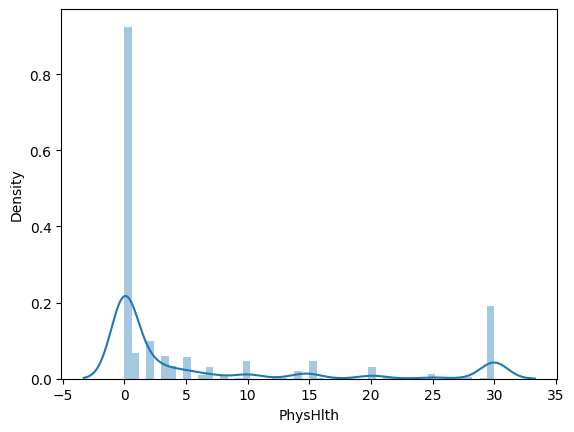

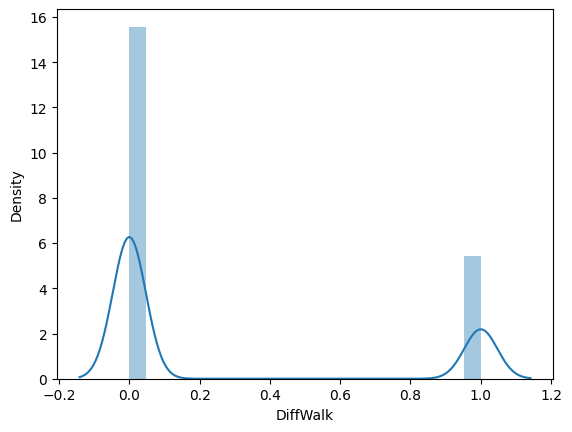

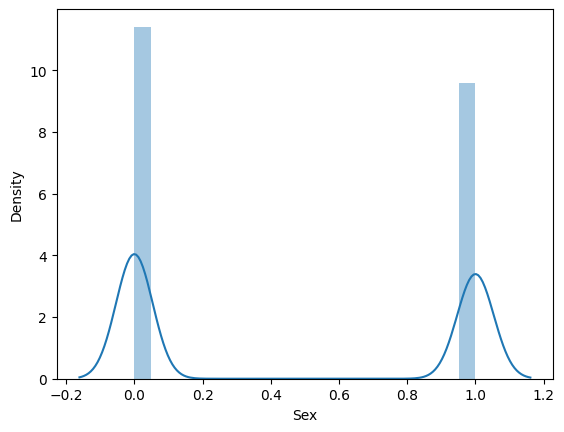

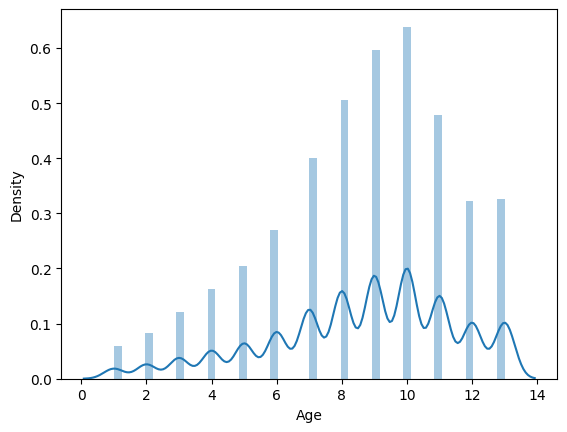

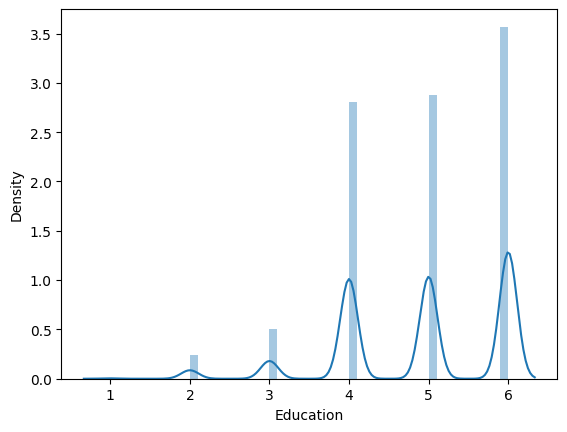

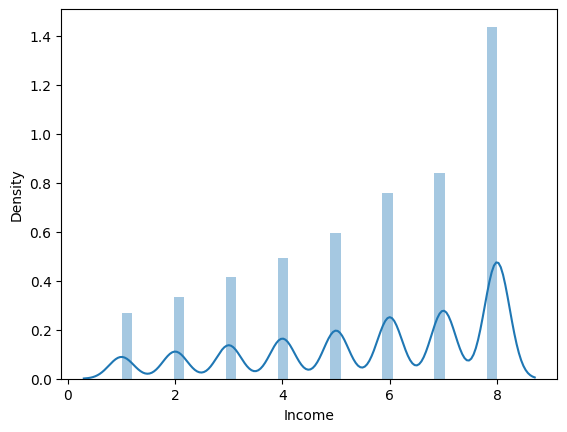

In [ ]:
for col in data.columns[:-1]:
  sns.distplot(data[col])
  plt.show()

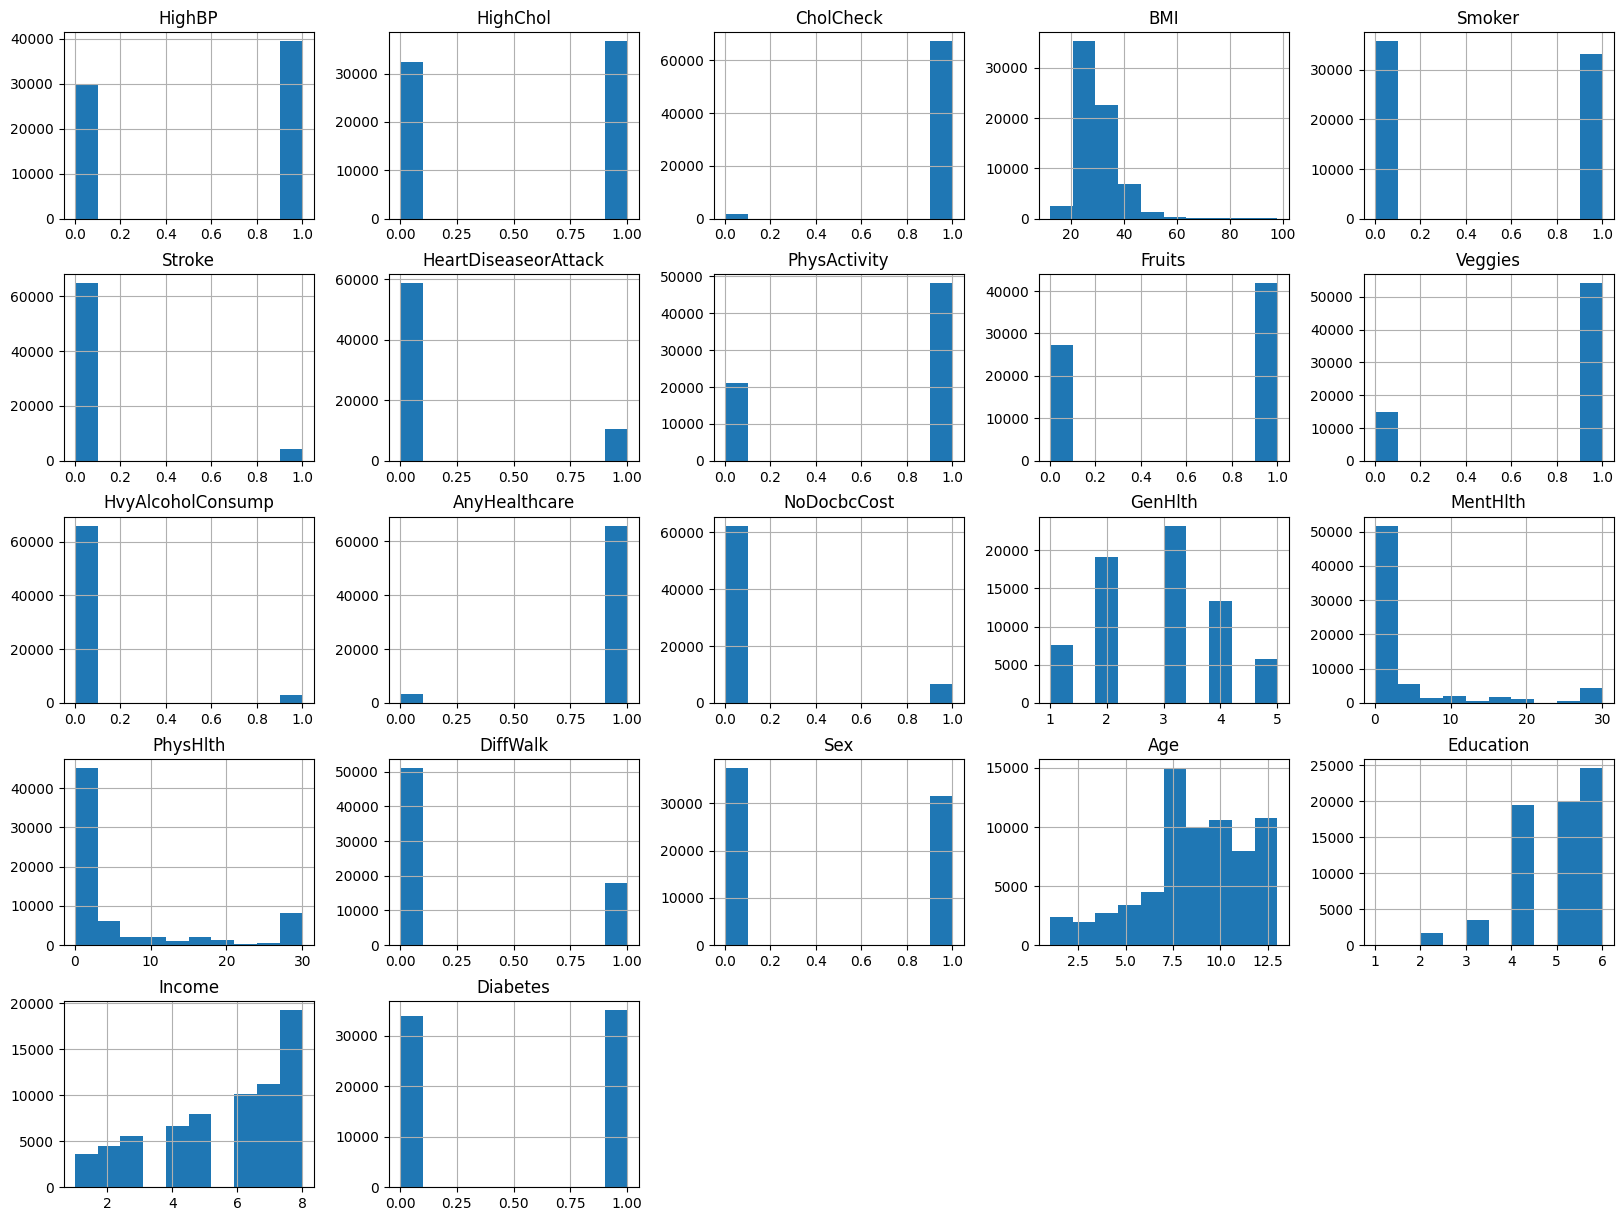

In [ ]:
data.hist(figsize=(20,15))
plt.show()

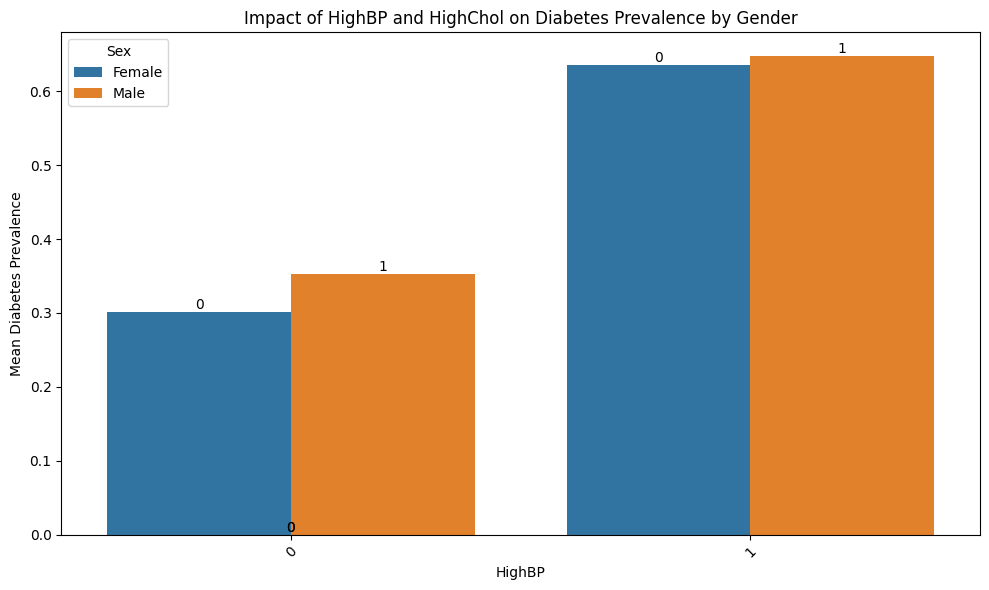

In [ ]:
# Choose two features to analyze
feature1 = 'HighBP'  # Example feature 1
feature2 = 'HighChol'  # Example feature 2

# Group data by Sex, feature1, and feature2, then calculate mean Diabetes
grouped_data = data.groupby(['Sex', feature1, feature2])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature1, y='Diabetes', hue='Sex', data=grouped_data, ci=None)
plt.xlabel(feature1)
plt.ylabel('Mean Diabetes Prevalence')
plt.title(f'Impact of {feature1} and {feature2} on Diabetes Prevalence by Gender')

# Add annotations for feature2 values
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    group_idx = i // len(grouped_data[feature1].unique())
    feature2_value = grouped_data[feature2].unique()[group_idx % len(grouped_data[feature2].unique())]
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(feature2_value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


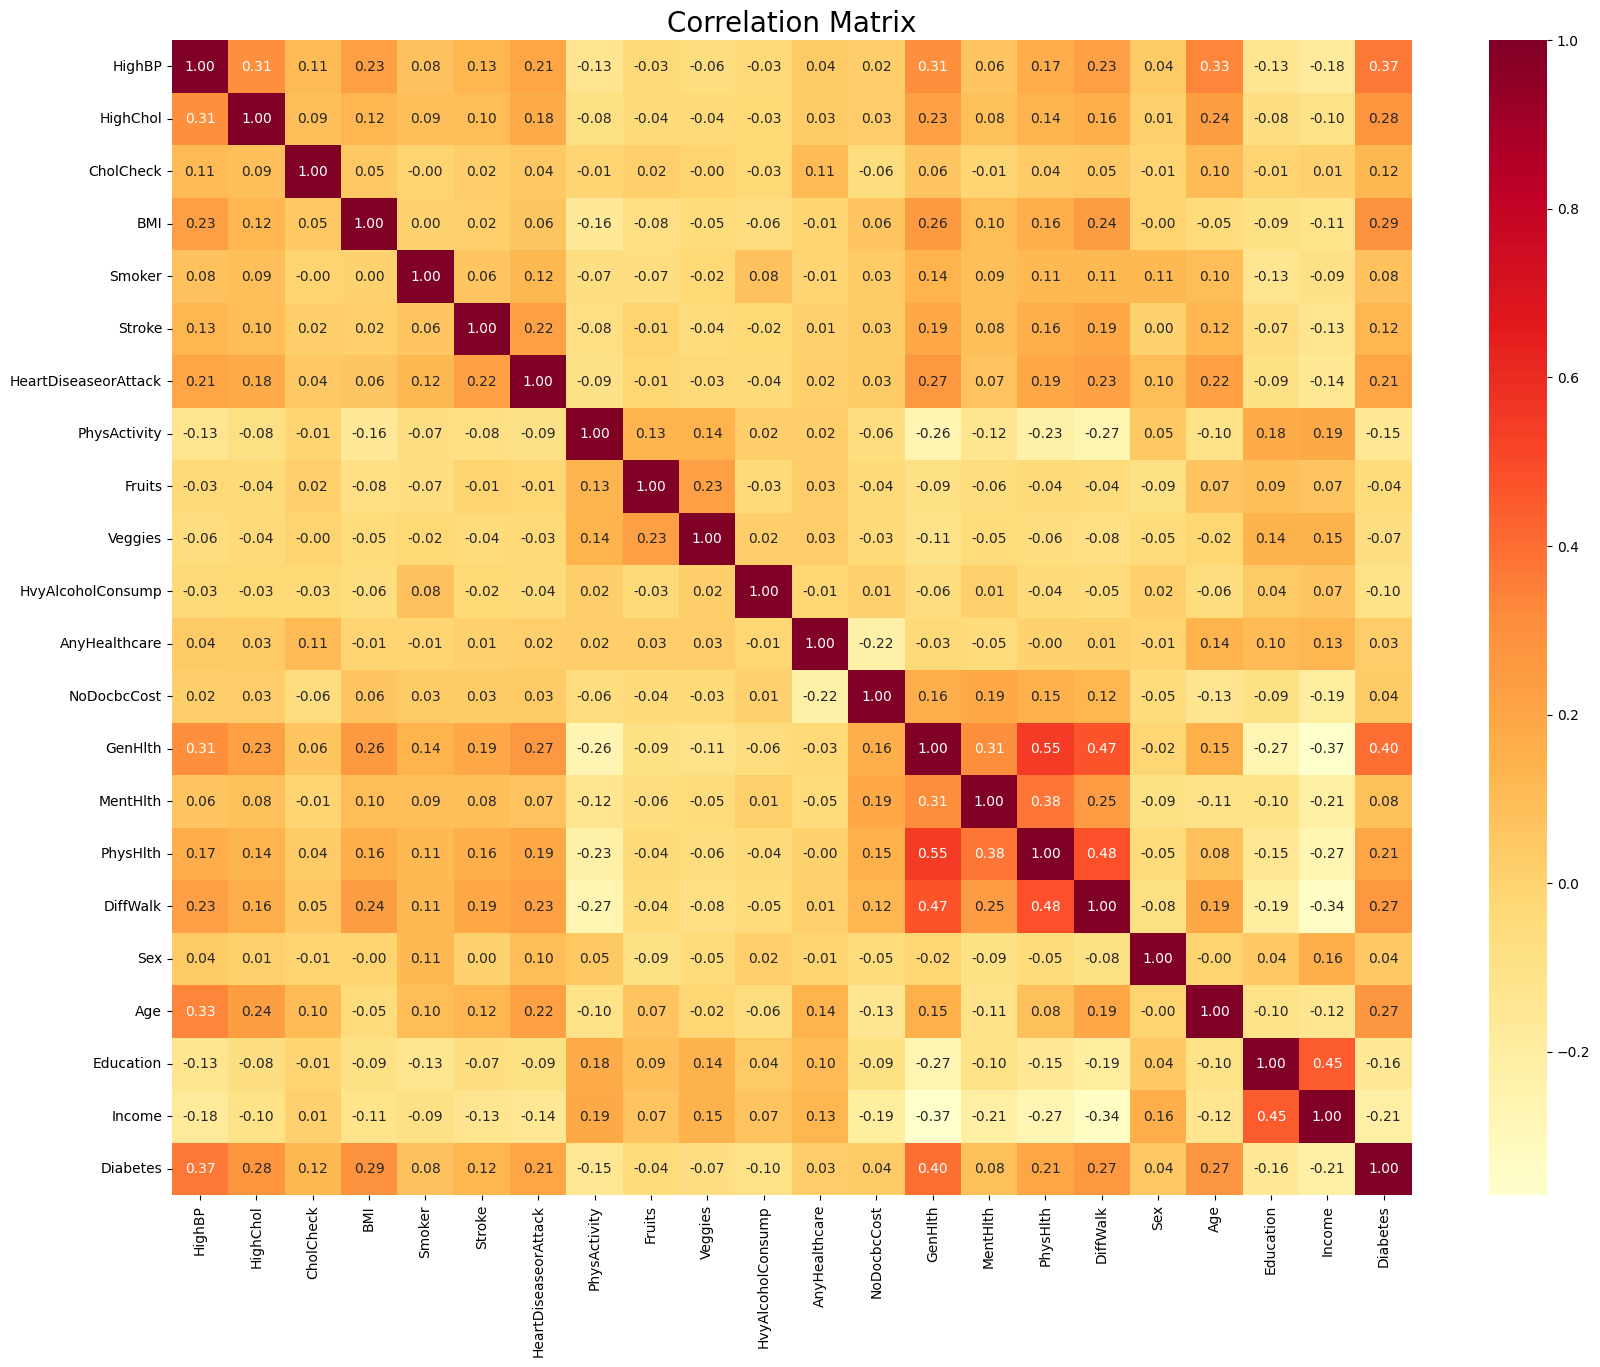

In [ ]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='YlOrRd')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

**Splitting**

In [ ]:
data1=data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])
data1.head()

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,0,26,0,0,1,0,1,3,30,0,1,4,6,8,0
1,1,1,26,1,0,0,0,1,3,0,0,1,12,6,8,0
2,0,0,26,0,0,1,0,1,1,10,0,1,13,6,8,0
3,1,1,28,0,0,1,0,1,3,3,0,1,11,6,8,0
4,0,0,29,0,0,1,0,1,2,0,0,0,8,5,8,0


In [ ]:
# Select features and target, drop columns as done previously
data1 = data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])

x = data1.drop('Diabetes', axis=1)
y = data1['Diabetes']

# Normalisasi data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Pilihan Anda (y > 0).astype(int) mengelompokkan 1 dan 2 menjadi 1.
y_binary = (y > 0).astype(int)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_binary, test_size=0.2, random_state=42)

# Reshape ke bentuk "pseudo-image"
num_features = x_train.shape[1]
print(f"Number of features: {num_features}")
image_dim = int(np.ceil(np.sqrt(num_features)))
print(f"Pseudo-image dimension: {image_dim}x{image_dim}")

# Padding jika perlu
def pad_features(x, target_dim):
    # Calculate the required padding size
    padding_size = (target_dim * target_dim) - x.shape[1]
    if padding_size < 0:
         # This should not happen if image_dim is calculated correctly
         raise ValueError("Target dimension is too small for the number of features.")
    padded = np.zeros((x.shape[0], target_dim * target_dim))
    padded[:, :x.shape[1]] = x
    return padded.reshape(-1, target_dim, target_dim, 1)

x_train_cnn = pad_features(x_train, image_dim)
x_test_cnn = pad_features(x_test, image_dim)

print(f"Shape of x_train_cnn: {x_train_cnn.shape}")
print(f"Shape of x_test_cnn: {x_test_cnn.shape}")


cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_dim, image_dim, 1), padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) #
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(x_train_cnn, y_train, epochs=5, batch_size=32, validation_data=(x_test_cnn, y_test))

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test)
print(f"CNN Loss: {cnn_loss}, CNN Accuracy: {cnn_accuracy}")


Number of features: 15
Pseudo-image dimension: 4x4
Shape of x_train_cnn: (55245, 4, 4, 1)
Shape of x_test_cnn: (13812, 4, 4, 1)
Epoch 1/5
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7104 - loss: 0.5646 - val_accuracy: 0.7418 - val_loss: 0.5192
Epoch 2/5
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7374 - loss: 0.5266 - val_accuracy: 0.7508 - val_loss: 0.5089
Epoch 3/5
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7416 - loss: 0.5209 - val_accuracy: 0.7514 - val_loss: 0.5079
Epoch 4/5
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7404 - loss: 0.5210 - val_accuracy: 0.7469 - val_loss: 0.5149
Epoch 5/5
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7429 - loss: 0.5172 - val_accuracy: 0.7545 - val_loss: 0.5052
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7624 - loss: 0.4996
CNN Loss: 0.5051571726799011, CNN Accuracy: 0.7544888257980347


In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 4, 4, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,077 (199.52 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,052 (133.02 KB)

In [ ]:
# Select features and target, drop columns as done previously
data1 = data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])

x = data1.drop('Diabetes', axis=1)
y = data1['Diabetes']

# Normalisasi data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Pilihan Anda (y > 0).astype(int) mengelompokkan 1 dan 2 menjadi 1.
y_binary = (y > 0).astype(int)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_binary, test_size=0.2, random_state=42)

# Reshape ke bentuk "pseudo-image"
num_features = x_train.shape[1]
print(f"Number of features: {num_features}")
image_dim = int(np.ceil(np.sqrt(num_features)))
print(f"Pseudo-image dimension: {image_dim}x{image_dim}")

# Padding jika perlu
def pad_features(x, target_dim):
    # Calculate the required padding size
    padding_size = (target_dim * target_dim) - x.shape[1]
    if padding_size < 0:
         # This should not happen if image_dim is calculated correctly
         raise ValueError("Target dimension is too small for the number of features.")
    padded = np.zeros((x.shape[0], target_dim * target_dim))
    padded[:, :x.shape[1]] = x
    return padded.reshape(-1, target_dim, target_dim, 1)

x_train_cnn = pad_features(x_train, image_dim)
x_test_cnn = pad_features(x_test, image_dim)

print(f"Shape of x_train_cnn: {x_train_cnn.shape}")
print(f"Shape of x_test_cnn: {x_test_cnn.shape}")


cnn_model2 = Sequential()

cnn_model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))

cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model2.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2))) #
cnn_model2.add(Flatten())
cnn_model2.add(Dense(64, activation='relu'))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model2.fit(x_train_cnn, y_train, epochs=50, batch_size=16, validation_data=(x_test_cnn, y_test))

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model2.evaluate(x_test_cnn, y_test)
print(f"CNN Loss: {cnn_loss}, CNN Accuracy: {cnn_accuracy}")


Number of features: 15
Pseudo-image dimension: 4x4
Shape of x_train_cnn: (55245, 4, 4, 1)
Shape of x_test_cnn: (13812, 4, 4, 1)
Epoch 1/50
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.7176 - loss: 0.5542 - val_accuracy: 0.7499 - val_loss: 0.5126
Epoch 2/50
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7439 - loss: 0.5194 - val_accuracy: 0.7464 - val_loss: 0.5112
Epoch 3/50
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7421 - loss: 0.5202 - val_accuracy: 0.7510 - val_loss: 0.5084
Epoch 4/50
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7414 - loss: 0.5215 - val_accuracy: 0.7554 - val_loss: 0.5056
Epoch 5/50
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7421 - loss: 0.5196 - val_accuracy: 0.7529 - val_loss: 0.5090
Epoch 6/50
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7427 - loss: 0.5181 - val_accuracy: 0.7562 - val_loss: 0.5052
Epoch 7/50
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7440 - loss: 0.51

In [ ]:
cnn_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 64)       │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,013 (449.27 KB)

 Trainable params: 38,337 (149.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76,676 (299.52 KB)

In [31]:
# Select features and target, drop columns as done previously
data1 = data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])

x = data1.drop('Diabetes', axis=1)
y = data1['Diabetes']

# Normalisasi data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Binarisasi target
y_binary = (y > 0).astype(int)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_binary, test_size=0.2, random_state=42)

# Reshape ke bentuk "pseudo-image"
num_features = x_train.shape[1]
image_dim = int(np.ceil(np.sqrt(num_features)))

def pad_features(x, target_dim):
    padding_size = (target_dim * target_dim) - x.shape[1]
    if padding_size < 0:
        raise ValueError("Target dimension is too small for the number of features.")
    padded = np.zeros((x.shape[0], target_dim * target_dim))
    padded[:, :x.shape[1]] = x
    return padded.reshape(-1, target_dim, target_dim, 1)

x_train_cnn = pad_features(x_train, image_dim)
x_test_cnn = pad_features(x_test, image_dim)

# Model CNN
cnn_model3 = Sequential()
cnn_model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(image_dim, image_dim, 1))) # Add input shape here
cnn_model3.add(LeakyReLU(alpha=0.1))
cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model3.add(Flatten())
cnn_model3.add(Dense(64, activation='relu'))
cnn_model3.add(Dropout(0.1))
cnn_model3.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Tambahkan EarlyStopping dan ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # Setengahkan learning rate
    patience=5,        # Setelah 3 epoch val_loss tidak membaik
    min_lr=1e-6,       # Learning rate minimum
    verbose=1
)

# Define the checkpoint callback *before* calling fit
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss")

# Train dengan early stopping
history = cnn_model3.fit(
    x_train_cnn, y_train,
    epochs=20,  # bisa lebih dari 5 sekarang
    batch_size=32,
    validation_data=(x_test_cnn, y_test),
    callbacks=[early_stop, lr_reducer, checkpoint]
)

# Evaluasi
cnn_loss, cnn_accuracy = cnn_model3.evaluate(x_test_cnn, y_test)
print(f"CNN Loss: {cnn_loss}, CNN Accuracy: {cnn_accuracy}")

Epoch 1/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7140 - loss: 0.5565

1727/1727 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7140 - loss: 0.5565 - val_accuracy: 0.7437 - val_loss: 0.5168 - learning_rate: 0.0010
Epoch 2/20
1711/1727 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7418 - loss: 0.5217

1727/1727 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7417 - loss: 0.5217 - val_accuracy: 0.7471 - val_loss: 0.5145 - learning_rate: 0.0010
Epoch 3/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7413 - loss: 0.5203

1727/1727 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7413 - loss: 0.5203 - val_accuracy: 0.7547 - val_loss: 0.5096 - learning_rate: 0.0010
Epoch 4/20
1724/1727 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7390 - loss: 0.5218

1727/1727 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7390 - loss: 0.5218 - val_accuracy: 0.7540 - val_loss: 0.5069 - learning_rate: 0.0010
Epoch 5/20
1723/1727 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7456 - loss: 0.5157

1727/1727 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7456 - loss: 0.5157 - val_accuracy: 0.7564 - val_loss: 0.5055 - learning_rate: 0.0010
Epoch 6/20
1720/1727 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7433 - loss: 0.5146

1727/1727 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7433 - loss: 0.5147 - val_accuracy: 0.7546 - val_loss: 0.5042 - learning_rate: 0.0010
Epoch 7/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7474 - loss: 0.5117 - val_accuracy: 0.7515 - val_loss: 0.5092 - learning_rate: 0.0010
Epoch 8/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7444 - loss: 0.5151 - val_accuracy: 0.7544 - val_loss: 0.5064 - learning_rate: 0.0010
Epoch 9/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7425 - loss: 0.5163 - val_accuracy: 0.7554 - val_loss: 0.5054 - learning_rate: 0.0010
Epoch 10/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7475 - loss: 0.5139 - val_accuracy: 0.7556 - val_loss: 0.5084 - learning_rate: 0.0010
Epoch 11/20
1721/1727 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7429 - loss: 0.5182

1727/1727 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7430 - loss: 0.5181 - val_accuracy: 0.7550 - val_loss: 0.5038 - learning_rate: 0.0010
Epoch 12/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7452 - loss: 0.5132 - val_accuracy: 0.7551 - val_loss: 0.5094 - learning_rate: 0.0010
Epoch 13/20
1714/1727 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7455 - loss: 0.5146

1727/1727 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7456 - loss: 0.5146 - val_accuracy: 0.7559 - val_loss: 0.5035 - learning_rate: 0.0010
Epoch 14/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7474 - loss: 0.5103 - val_accuracy: 0.7560 - val_loss: 0.5038 - learning_rate: 0.0010
Epoch 15/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7472 - loss: 0.5114 - val_accuracy: 0.7519 - val_loss: 0.5094 - learning_rate: 0.0010
Epoch 16/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7457 - loss: 0.5116 - val_accuracy: 0.7555 - val_loss: 0.5058 - learning_rate: 0.0010
Epoch 17/20
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7490 - loss: 0.5109 - val_accuracy: 0.7566 - val_loss: 0.5040 - learning_rate: 0.0010
Epoch 18/20
1722/1727 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7506 - loss: 0.5091
Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1727/1727 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7506 - loss

In [32]:
cnn_model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 4, 4, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 128)      │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,901 (534.77 KB)

 Trainable params: 45,633 (178.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 91,268 (356.52 KB)

432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


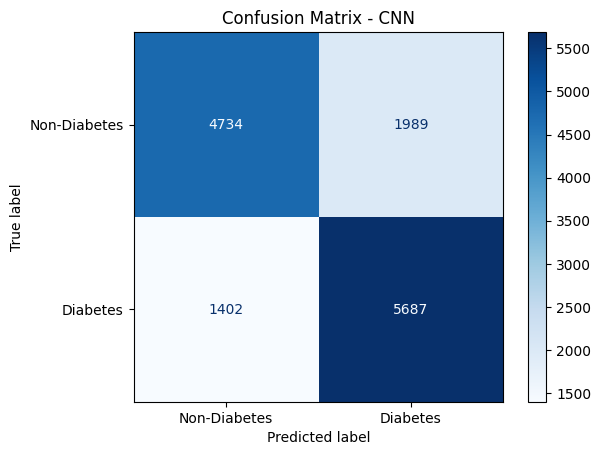

              precision    recall  f1-score   support

Non-Diabetes       0.77      0.70      0.74      6723
    Diabetes       0.74      0.80      0.77      7089

    accuracy                           0.75     13812
   macro avg       0.76      0.75      0.75     13812
weighted avg       0.76      0.75      0.75     13812



In [ ]:


# Prediksi probabilitas dan ubah ke label biner (0 atau 1)
y_pred_prob = cnn_model.predict(x_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CNN")
plt.show()

# (Opsional) Laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=["Non-Diabetes", "Diabetes"]))


432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


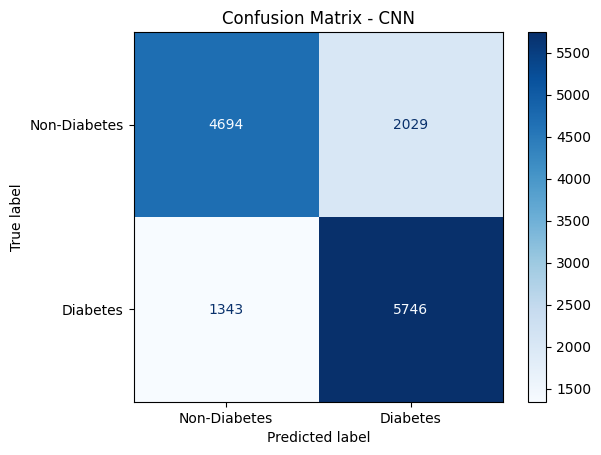

              precision    recall  f1-score   support

Non-Diabetes       0.78      0.70      0.74      6723
    Diabetes       0.74      0.81      0.77      7089

    accuracy                           0.76     13812
   macro avg       0.76      0.75      0.75     13812
weighted avg       0.76      0.76      0.75     13812



In [ ]:
# Prediksi probabilitas dan ubah ke label biner (0 atau 1)
y_pred_prob = cnn_model2.predict(x_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CNN")
plt.show()

# (Opsional) Laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=["Non-Diabetes", "Diabetes"]))

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


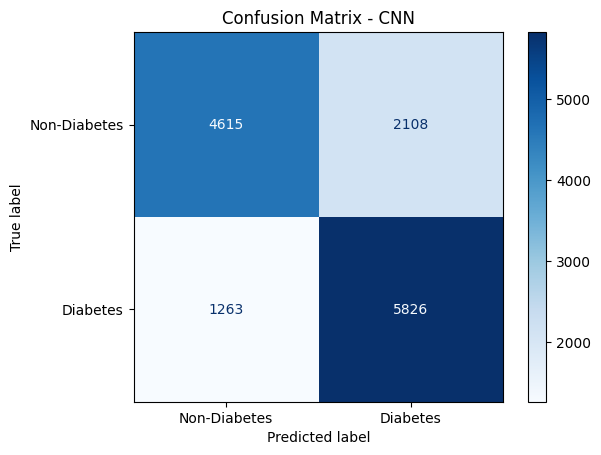

              precision    recall  f1-score   support

Non-Diabetes       0.79      0.69      0.73      6723
    Diabetes       0.73      0.82      0.78      7089

    accuracy                           0.76     13812
   macro avg       0.76      0.75      0.75     13812
weighted avg       0.76      0.76      0.75     13812



In [36]:
# Prediksi probabilitas dan ubah ke label biner (0 atau 1)
y_pred_prob = cnn_model3.predict(x_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CNN")
plt.show()

# (Opsional) Laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=["Non-Diabetes", "Diabetes"]))

In [ ]:
def predict_diabetes(model, scaler_obj, target_image_dim):
    print("\n=== Diabetes Risk Assessment ===")
    print("Please answer the following health-related questions:\n")

    # Define the features in the same order as the input data used for training
    # Exclude the columns dropped before splitting
    feature_order = ['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack',
                     'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare',
                     'GenHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

    questions = {
        'HighBP': ("Apakah Anda memiliki tekanan darah tinggi? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'HighChol': ("Apakah Anda memiliki kadar kolesterol tinggi? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'BMI': ("Berapa nilai Indeks Massa Tubuh (BMI) Anda? (contoh: antara 10 - 50): ", 10, 50),
        'Stroke': ("Apakah Anda pernah mengalami stroke? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'HeartDiseaseorAttack': ("Apakah Anda memiliki penyakit jantung atau pernah mengalami serangan jantung? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'PhysActivity': ("Apakah Anda rutin melakukan aktivitas fisik? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'HvyAlcoholConsump': ("Apakah Anda mengonsumsi alkohol dalam jumlah berlebihan? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'AnyHealthcare': ("Apakah Anda memiliki akses terhadap layanan kesehatan? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'GenHlth': ("Bagaimana kondisi kesehatan umum Anda? (1 = Sangat Sehat, 2 = Sehat, 3 = Cukup, 4 = Kurang Sehat, 5 = Sakit): ", 1, 5),
        'PhysHlth': ("Berapa hari dalam 30 hari terakhir Anda mengalami masalah kesehatan fisik? (0 - 30): ", 0, 30),
        'DiffWalk': ("Apakah Anda mengalami kesulitan saat berjalan? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'Sex': ("Jenis kelamin Anda? (0 = Perempuan, 1 = Laki-laki): ", [0, 1]),
        'Age': ("Kelompok usia Anda? (1 = 18-24, 2 = 25-29, ..., 13 = 80 tahun ke atas): ", 1, 13),
        'Education': ("Tingkat pendidikan Anda? (1 = Tidak Sekolah, ..., 6 = Perguruan Tinggi): ", 1, 6),
        'Income': ("Tingkat pendapatan Anda? (1 = Terendah, ..., 8 = Tertinggi): ", 1, 8)
    }

    user_features = {}

    for key in feature_order:
         question, *valid = questions[key]
         while True:
            try:
                user_input = input(question)

                if len(valid) == 1:
                    value = int(user_input)
                    if value not in valid[0]:
                        raise ValueError(f"Please enter {valid[0][0]} or {valid[0][1]}")
                else:
                    value = int(user_input)
                    if not (valid[0] <= value <= valid[1]):
                        raise ValueError(f"Please enter between {valid[0]} and {valid[1]}")

                user_features[key] = value
                break

            except ValueError as e:
                print(f"Invalid input: {e}. Please try again.")

    # Convert user input dictionary to a pandas DataFrame in the correct column order
    user_features_df = pd.DataFrame([user_features], columns=feature_order)

    # Scale the user input using the same scaler used for training
    user_features_scaled = scaler_obj.transform(user_features_df)

    # Pad the scaled features to match the CNN input shape
    user_features_cnn_input = pad_features(user_features_scaled, target_image_dim)


    # Make prediction using the trained model
    # The CNN model outputs a probability between 0 and 1 because of the sigmoid activation
    prediction_probability = model.predict(user_features_cnn_input)[0][0]

    # Convert probability to a binary prediction (0 or 1)
    prediction = 1 if prediction_probability > 0.5 else 0


    print("\n=== Hasil ===")
    if prediction == 1:
        print(f"Berdasarkan hasil skrining, risiko diabetes Anda adalah Tinggi. (Probabilitas: {prediction_probability:.2f})")

    else:
        print(f"Berdasarkan hasil skrining, risiko diabetes Anda adalah Rendah. (Probabilitas: {prediction_probability:.2f})")

    # Removed the call to saran_pencegahan as it's not defined

    return prediction_probability # Return the probability instead of the binary result

# Example usage
if __name__ == "__main__":
    # Pass the trained CNN model, the scaler, and the target image dimension to the function
    prediction_result_prob = predict_diabetes(cnn_model3, scaler, image_dim)


=== Diabetes Risk Assessment ===
Please answer the following health-related questions:

Apakah Anda memiliki tekanan darah tinggi? (0 = Tidak, 1 = Ya): 1
Apakah Anda memiliki kadar kolesterol tinggi? (0 = Tidak, 1 = Ya): 1
Berapa nilai Indeks Massa Tubuh (BMI) Anda? (contoh: antara 10 - 50): 40
Apakah Anda pernah mengalami stroke? (0 = Tidak, 1 = Ya): 1
Apakah Anda memiliki penyakit jantung atau pernah mengalami serangan jantung? (0 = Tidak, 1 = Ya): 1
Apakah Anda rutin melakukan aktivitas fisik? (0 = Tidak, 1 = Ya): 1
Apakah Anda mengonsumsi alkohol dalam jumlah berlebihan? (0 = Tidak, 1 = Ya): 1
Apakah Anda memiliki akses terhadap layanan kesehatan? (0 = Tidak, 1 = Ya): 1
Bagaimana kondisi kesehatan umum Anda? (1 = Sangat Sehat, 2 = Sehat, 3 = Cukup, 4 = Kurang Sehat, 5 = Sakit): 4
Berapa hari dalam 30 hari terakhir Anda mengalami masalah kesehatan fisik? (0 - 30): 2
Apakah Anda mengalami kesulitan saat berjalan? (0 = Tidak, 1 = Ya): 1
Jenis kelamin Anda? (0 = Perempuan, 1 = Laki-la

In [37]:
# Simpan model ke file HDF5 (.h5)
cnn_model3.save('best_model.h5')